In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
# Fetch daily data for the S&P 500 from Yahoo Finance
Index = yf.Ticker('^KLSE').history (period = 'max', interval='1mo')
Index

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1994-01-01,1278.609985,1332.040039,967.919983,1106.989990,0,0,0
1994-02-01,1114.319946,1158.130005,1065.010010,1125.630005,0,0,0
1994-03-01,1124.959961,1125.630005,936.799988,952.719971,0,0,0
1994-04-01,954.489990,1067.750000,920.280029,1054.500000,0,0,0
1994-05-01,1054.130005,1054.130005,983.450012,993.729980,0,0,0
...,...,...,...,...,...,...,...
2022-08-01,1492.670044,1527.839966,1464.829956,1512.050049,4723634700,0,0
2022-09-01,1498.010010,1503.489990,1390.410034,1394.630005,4812094000,0,0
2022-10-01,1393.699951,1468.410034,1372.569946,1460.380005,4200012200,0,0


In [3]:
# Calculate daily returns
Index['return'] = Index['Close'].pct_change()

In [4]:
# Calculate annual returns
returns = Index['return'].groupby(Index['return'].index.year).apply(lambda x: (1 + x).prod() - 1) * 100

In [5]:
# Calculate the average return
expected_return = np.mean(returns)
print(expected_return)  

3.262996952077125


Visualisation

In [6]:
# Extract the return data and the dates
returns = Index['return'] * 100
dates = Index.index

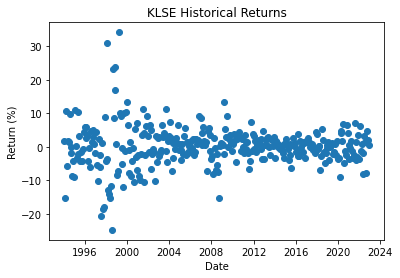

In [7]:
# Add axis labels and a title
plt.xlabel('Date')
plt.ylabel('Return (%)')
plt.title('KLSE Historical Returns')

# Create a scatterplot of the returns data
plt.scatter(dates, returns);